<a href="https://colab.research.google.com/github/MayankKonduri/UTAustin_ProfessorChen_ReLU/blob/main/Mayank_Summer_2025_Experiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CE24-inspired ReLU network training on MNIST subset using PyTorch and TensorFlow data

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# 1. Load MNIST data using tf.keras
def load_mnist_subset(classes):
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Flatten and normalize
    x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
    x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

    # Filter classes
    train_mask = np.isin(y_train, classes)
    test_mask = np.isin(y_test, classes)

    x_train, y_train = x_train[train_mask], y_train[train_mask]
    x_test, y_test = x_test[test_mask], y_test[test_mask]

    # Relabel classes to 0, 1, 2, ...
    label_map = {c: i for i, c in enumerate(classes)}
    y_train = np.vectorize(label_map.get)(y_train)
    y_test = np.vectorize(label_map.get)(y_test)

    return (x_train, y_train), (x_test, y_test)

# 2. Define CE24-inspired model (Q+1 layers for Q classes)
class CE24Net(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=128, num_classes=3):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# 3. Training routine
def train_model(model, train_loader, test_loader, epochs=10, lr=1e-3):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            preds = model(xb)
            loss = loss_fn(preds, yb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

        # Evaluate
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for xb, yb in test_loader:
                xb, yb = xb.to(device), yb.to(device)
                preds = model(xb)
                correct += (preds.argmax(1) == yb).sum().item()
                total += yb.size(0)
        print(f"Test Accuracy: {correct / total:.4f}")

# 4. Run everything
classes = [0, 3, 8]
(x_train, y_train), (x_test, y_test) = load_mnist_subset(classes)

train_ds = TensorDataset(torch.tensor(x_train), torch.tensor(y_train))
test_ds = TensorDataset(torch.tensor(x_test), torch.tensor(y_test))
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=256)

model = CE24Net(num_classes=len(classes))
train_model(model, train_loader, test_loader, epochs=10, lr=1e-3)  # Adjust epochs as needed


In [ ]:
# CE24-inspired ReLU network training on MNIST subset using PyTorch and TensorFlow data

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# 1. Load MNIST data using tf.keras
def load_mnist_subset(classes):
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Flatten and normalize
    x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
    x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

    # Filter classes
    train_mask = np.isin(y_train, classes)
    test_mask = np.isin(y_test, classes)

    x_train, y_train = x_train[train_mask], y_train[train_mask]
    x_test, y_test = x_test[test_mask], y_test[test_mask]

    # Relabel classes to 0, 1, 2, ...
    label_map = {c: i for i, c in enumerate(classes)}
    y_train = np.vectorize(label_map.get)(y_train)
    y_test = np.vectorize(label_map.get)(y_test)

    return (x_train, y_train), (x_test, y_test)

# 2. Define CE24-inspired model (Q+1 layers for Q classes)
class CE24Net(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=128, num_classes=3):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# 3. Training routine
def train_model(model, train_loader, test_loader, epochs=10, lr=1e-3):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            preds = model(xb)
            loss = loss_fn(preds, yb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

        # Evaluate
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for xb, yb in test_loader:
                xb, yb = xb.to(device), yb.to(device)
                preds = model(xb)
                correct += (preds.argmax(1) == yb).sum().item()
                total += yb.size(0)
        print(f"Test Accuracy: {correct / total:.4f}")

# 4. Extract cumulative parameters (weights and biases)
def extract_layer_params(model):
    weights = []
    biases = []
    for layer in model.net:
        if isinstance(layer, nn.Linear):
            weights.append(layer.weight.detach().cpu().numpy())
            biases.append(layer.bias.detach().cpu().numpy())
    return weights, biases

# 5. Run everything
classes = [0, 3, 8]
(x_train, y_train), (x_test, y_test) = load_mnist_subset(classes)

train_ds = TensorDataset(torch.tensor(x_train), torch.tensor(y_train))
test_ds = TensorDataset(torch.tensor(x_test), torch.tensor(y_test))
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=256)

model = CE24Net(num_classes=len(classes))
train_model(model, train_loader, test_loader, epochs=10, lr=1e-3)  # Adjust epochs as needed

# Extract and print weights and biases
W_list, b_list = extract_layer_params(model)
for i, (W, b) in enumerate(zip(W_list, b_list)):
    print(f"\nLayer {i+1} weights shape: {W.shape}, biases shape: {b.shape}")

In [ ]:
# ✅ Step 1: Setup
!pip install -q tensorflow numpy matplotlib scikit-learn seaborn

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA
import seaborn as sns

# ✅ Step 2: Load and filter MNIST to classes 1, 3, 7
(x_train, y_train), (x_test, y_test) = mnist.load_data()

selected_classes = [1, 3, 7]
class_map = {label: i for i, label in enumerate(selected_classes)}

def filter_and_map(x, y):
    mask = np.isin(y, selected_classes)
    x = x[mask].reshape(-1, 784).astype("float32") / 255.
    y = np.array([class_map[yi] for yi in y[mask]])
    y_cat = to_categorical(y, num_classes=3)
    return x, y, y_cat

x_train_f, y_train_f, y_train_cat = filter_and_map(x_train, y_train)
x_test_f, y_test_f, y_test_cat = filter_and_map(x_test, y_test)

# ✅ Step 3: Build CE24-style ReLU network (1 ReLU layer per class + final softmax)
inputs = Input(shape=(784,))
h1 = Dense(16, activation='relu', name='layer1')(inputs)  # could be viewed as class 1 cone refiner
h2 = Dense(16, activation='relu', name='layer2')(h1)      # class 2 cone refiner
h3 = Dense(16, activation='relu', name='layer3')(h2)      # class 3 cone refiner
outputs = Dense(3, activation='softmax', name='output')(h3)
model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Step 4: Train the model
model.fit(x_train_f, y_train_cat, epochs=10, batch_size=128, validation_split=0.1)

# ✅ Step 5: Build sub-model for layer-wise activations (cones)
layer_names = ['layer1', 'layer2', 'layer3']
activation_models = [Model(inputs=inputs, outputs=model.get_layer(name).output) for name in layer_names]

# Pick the final ReLU layer to analyze
activations = activation_models[-1].predict(x_test_f)
activation_patterns = (activations > 0).astype(int)

# ✅ Step 6: Find unique activation patterns = unique cones
unique_patterns, counts = np.unique(activation_patterns, axis=0, return_counts=True)

# Assign pattern IDs for visualization
pattern_ids = np.array([np.where((unique_patterns == ap).all(axis=1))[0][0] for ap in activation_patterns])

# ✅ Step 7: Visualize activation cones using PCA
pca = PCA(n_components=2)
x_test_pca = pca.fit_transform(x_test_f)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=pattern_ids, cmap='tab20', s=10, alpha=0.7)
plt.colorbar(scatter, label='Activation Pattern ID')
plt.title("Cones (Activation Patterns) in PCA-Reduced MNIST Space")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

# ✅ Step 8: Print summary of unique activation patterns
import pandas as pd
df_patterns = pd.DataFrame({
    "Pattern ID": list(range(len(unique_patterns))),
    "Pattern Vector": [list(p) for p in unique_patterns],
    "Count": counts
})
df_patterns.sort_values("Count", ascending=False).head(10)


In [ ]:
# Re-import after code reset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical

# Load and preprocess MNIST for 3-class classification (digits 1, 3, 7)
selected_classes = [1, 3, 7]
class_map = {label: i for i, label in enumerate(selected_classes)}

def preprocess(x, y):
    mask = np.isin(y, selected_classes)
    x = x[mask].reshape(-1, 784).astype("float32") / 255.
    y = np.array([class_map[yi] for yi in y[mask]])
    y_cat = to_categorical(y, num_classes=3)
    return x, y, y_cat

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_f, y_train_f, y_train_cat = preprocess(x_train, y_train)
x_test_f, y_test_f, y_test_cat = preprocess(x_test, y_test)

# Define model with Q+1 = 4 layers (3 hidden + output)
inputs = Input(shape=(784,))
h1 = Dense(64, activation='relu', name='layer1')(inputs)
h2 = Dense(32, activation='relu', name='layer2')(h1)
h3 = Dense(16, activation='relu', name='layer3')(h2)
outputs = Dense(3, activation='softmax', name='output')(h3)
model = Model(inputs=inputs, outputs=outputs)

# Train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_f, y_train_cat, epochs=10, batch_size=128, verbose=0)

# Get activations from last ReLU layer for test inputs
layer_output_model = Model(inputs=model.input, outputs=model.get_layer('layer3').output)
activations = layer_output_model.predict(x_test_f)
binary_patterns = (activations > 0).astype(int)

# Convert activation pattern vectors to unique IDs
pattern_ids = [int("".join(map(str, row)), 2) for row in binary_patterns]

# PCA for visualization
pca = PCA(n_components=2)
x_test_pca = pca.fit_transform(x_test_f)

# Plot with activation pattern ID coloring
plt.figure(figsize=(10, 7))
palette = sns.color_palette("hls", len(set(pattern_ids)))
sns.scatterplot(x=x_test_pca[:, 0], y=x_test_pca[:, 1], hue=pattern_ids, palette=palette, legend=None, s=10)
plt.title("Visualization of Cones via ReLU Activation Patterns")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Top Cone Activation Patterns:
     Pattern ID                                    Pattern Vector  Count
120         120  [1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1]    307
65           65  [1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]    194
48           48  [1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]    169
12           12  [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0]    165
73           73  [1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1]    136
6             6  [0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0]    132
92           92  [1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]    129
3             3  [0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0]    124
84           84  [1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]    112
51           51  [1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]    108


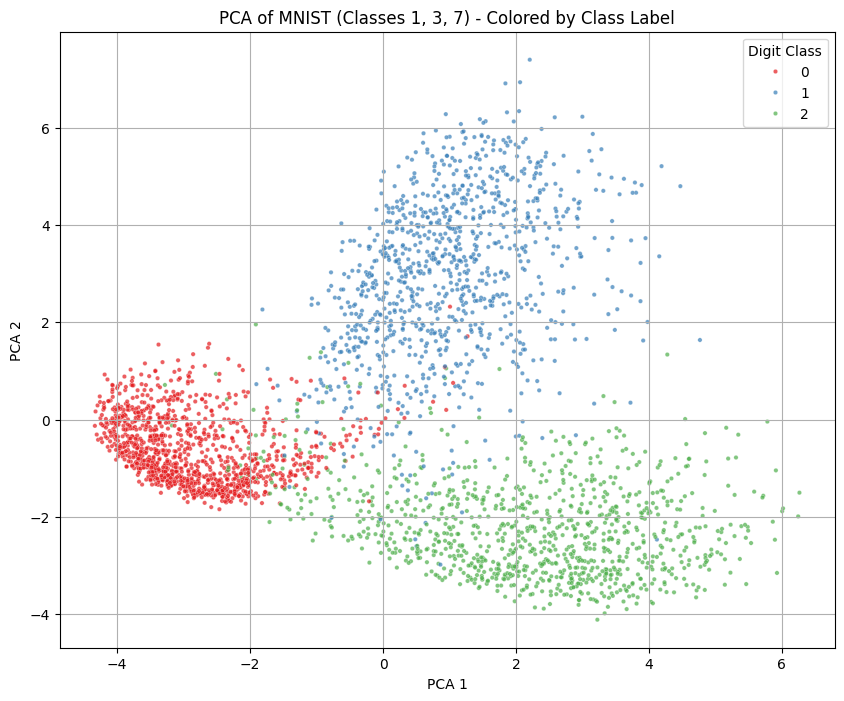

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 64 is different from 16)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical

selected_classes = [1, 3, 7]
class_map = {label: i for i, label in enumerate(selected_classes)}

def preprocess(x, y):
    mask = np.isin(y, selected_classes)
    x = x[mask].reshape(-1, 784).astype("float32") / 255.
    y = np.array([class_map[yi] for yi in y[mask]])
    y_cat = to_categorical(y, num_classes=3)
    return x, y, y_cat

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_f, y_train_f, y_train_cat = preprocess(x_train, y_train)
x_test_f, y_test_f, y_test_cat = preprocess(x_test, y_test)

#Model Architecture: Q=3 → Q+1 = 4 layers
inputs = Input(shape=(784,))
h1 = Dense(64, activation='relu', name='layer1')(inputs)
h2 = Dense(32, activation='relu', name='layer2')(h1)
h3 = Dense(16, activation='relu', name='layer3')(h2)
outputs = Dense(3, activation='softmax', name='output')(h3)
model = Model(inputs=inputs, outputs=outputs)

#Train using Gradient Descent
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_f, y_train_cat, epochs=10, batch_size=128, validation_split=0.1, verbose=0)

#Activation Patterns (Cones)
activation_model = Model(inputs=model.input, outputs=model.get_layer('layer3').output)
activations = activation_model.predict(x_test_f)
binary_patterns = (activations > 0).astype(int)

#Get Unique Cones
unique_patterns, counts = np.unique(binary_patterns, axis=0, return_counts=True)
pattern_ids = np.array([np.where((unique_patterns == ap).all(axis=1))[0][0] for ap in binary_patterns])

#Cone Statistics Table
df_patterns = pd.DataFrame({
    "Pattern ID": list(range(len(unique_patterns))),
    "Pattern Vector": [list(p) for p in unique_patterns],
    "Count": counts
})
df_patterns.sort_values("Count", ascending=False, inplace=True)
print("Top Cone Activation Patterns:")
print(df_patterns.head(10))

#PCA Visualization
pca = PCA(n_components=2)
x_test_pca = pca.fit_transform(x_test_f)

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=x_test_pca[:, 0],
    y=x_test_pca[:, 1],
    hue=y_test_f,  # Use original class labels: 0, 1, 2 (for 1, 3, 7)
    palette='Set1',
    s=10,
    alpha=0.7
)
plt.title("PCA of MNIST (Classes 1, 3, 7) - Colored by Class Label")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Digit Class")
plt.grid(True)
plt.show()

#NOT WORKING: Compute cumulative weights and biases (for cone edge directions)
weights_biases = {}
for layer in model.layers:
    weights = layer.get_weights()
    if len(weights) == 2:
        W, b = weights
        weights_biases[layer.name] = {'weights': W, 'biases': b}

W1 = weights_biases['layer1']['weights']
b1 = weights_biases['layer1']['biases']
W2 = weights_biases['layer2']['weights']
b2 = weights_biases['layer2']['biases']
W3 = weights_biases['layer3']['weights']
b3 = weights_biases['layer3']['biases']

W_total = W3 @ W2 @ W1
b_total = W3 @ (W2 @ b1 + b2) + b3

print("\nCumulative weight matrix shape:", W_total.shape)
print("Cumulative bias vector shape:", b_total.shape)  # These are base points + edges of cones


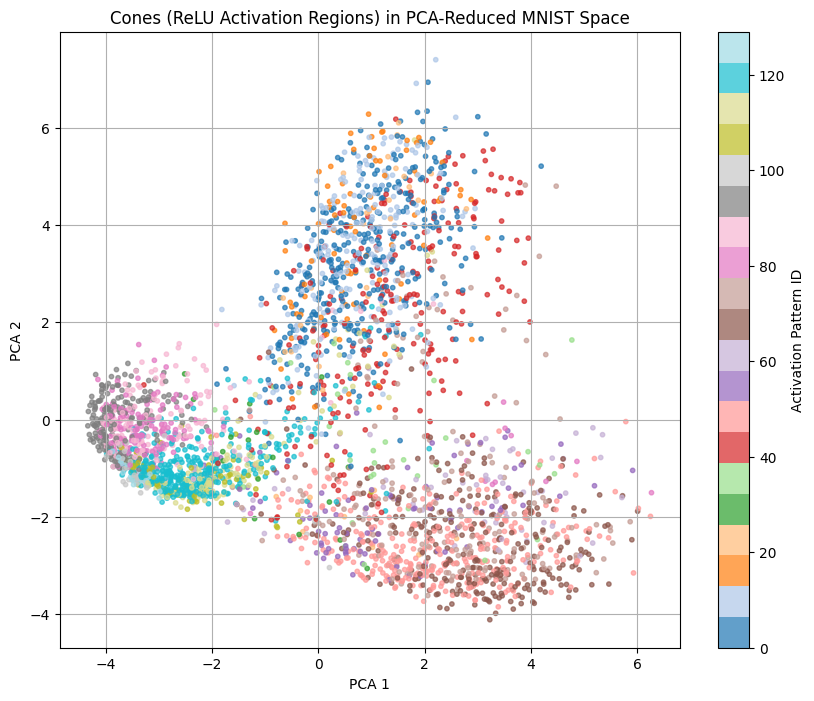

In [6]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=pattern_ids, cmap='tab20', s=10, alpha=0.7)
plt.colorbar(scatter, label='Activation Pattern ID')
plt.title("Cones (ReLU Activation Regions) in PCA-Reduced MNIST Space")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()
